# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]/10
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortaleza
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | megion
Processing Record 6 of Set 1 | jindabyne
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | monrovia
Processing Record 14 of Set 1 | kirensk
Processing Record 15 of Set 1 | chopinzinho
Processing Record 16 of Set 1 | cambria
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | devnya
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | sitka
Processing Record 23 of 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortaleza,-3.7227,-38.5247,30.271,89,40,2.06,BR,1711760504
1,kodiak,57.7900,-152.4072,27.988,76,100,5.14,US,1711760624
2,puerto natales,-51.7236,-72.4875,27.723,74,49,5.57,CL,1711760477
3,kingston,17.9970,-76.7936,30.168,76,20,1.03,JM,1711760471
4,megion,61.0296,76.1136,27.316,97,100,4.47,RU,1711760624


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortaleza,-3.7227,-38.5247,30.271,89,40,2.06,BR,1711760504
1,kodiak,57.7900,-152.4072,27.988,76,100,5.14,US,1711760624
2,puerto natales,-51.7236,-72.4875,27.723,74,49,5.57,CL,1711760477
3,kingston,17.9970,-76.7936,30.168,76,20,1.03,JM,1711760471
4,megion,61.0296,76.1136,27.316,97,100,4.47,RU,1711760624


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

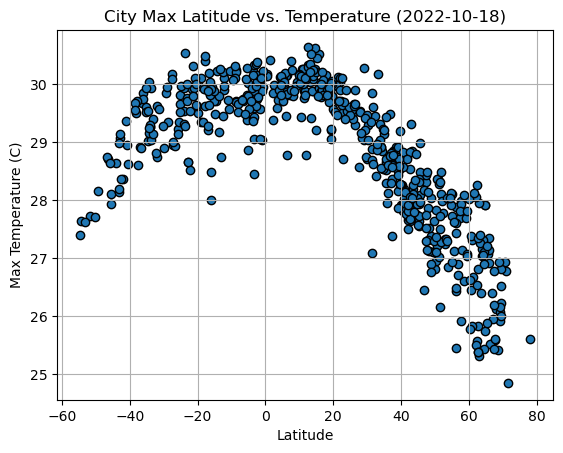

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

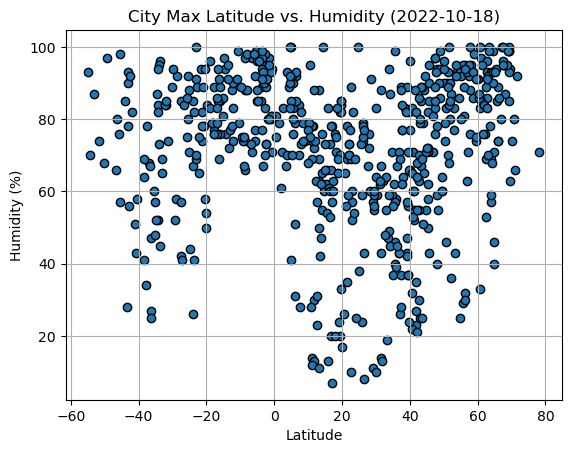

In [21]:
# Build the scatter plots for latitude vs. humidity
tempplot=plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

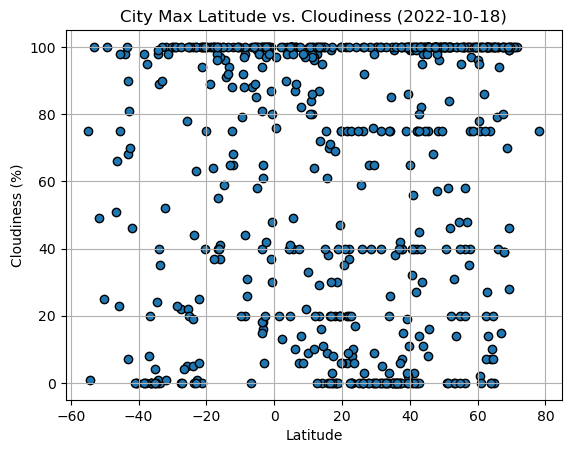

In [22]:
# Build the scatter plots for latitude vs. cloudiness
tempplot=plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

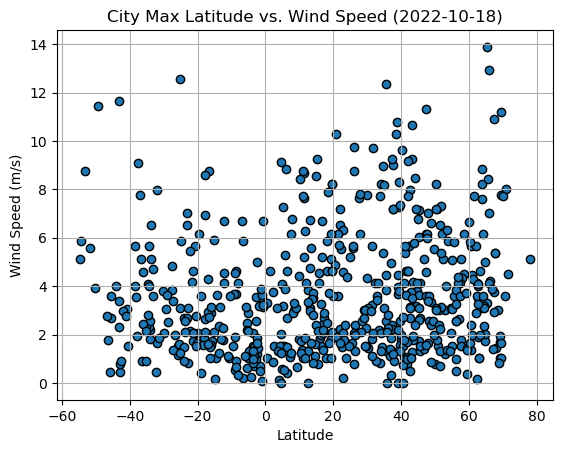

In [23]:
# Build the scatter plots for latitude vs. wind speed
tempplot=plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def regress_plot(x,y):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress=x*slope+intercept
    line_equation=("y = "+str(round(slope,2))+"x + "+str(round(intercept,2)))
    print(f"The r-value is: {regress**2}")
    plt.scatter(x,y,edgecolor="black")
    plt.plot(x,regress,"r-")
    plt.grid()
    return line_equation

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,27.988,76,100,5.14,US,1711760624
3,kingston,17.9970,-76.7936,30.168,76,20,1.03,JM,1711760471
4,megion,61.0296,76.1136,27.316,97,100,4.47,RU,1711760624
7,bathsheba,13.2167,-59.5167,30.049,69,20,3.09,BB,1711760625
8,thompson,55.7435,-97.8558,27.124,29,100,3.60,CA,1711760579


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lng"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortaleza,-3.7227,-38.5247,30.271,89,40,2.06,BR,1711760504
1,kodiak,57.7900,-152.4072,27.988,76,100,5.14,US,1711760624
2,puerto natales,-51.7236,-72.4875,27.723,74,49,5.57,CL,1711760477
3,kingston,17.9970,-76.7936,30.168,76,20,1.03,JM,1711760471
7,bathsheba,13.2167,-59.5167,30.049,69,20,3.09,BB,1711760625


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: City_ID
1      740.255029
3      880.667852
4      729.360269
7      898.355417
8      747.179026
          ...    
588    803.241457
589    791.892368
590    790.562428
591    810.732738
592    751.443777
Name: Lat, Length: 412, dtype: float64


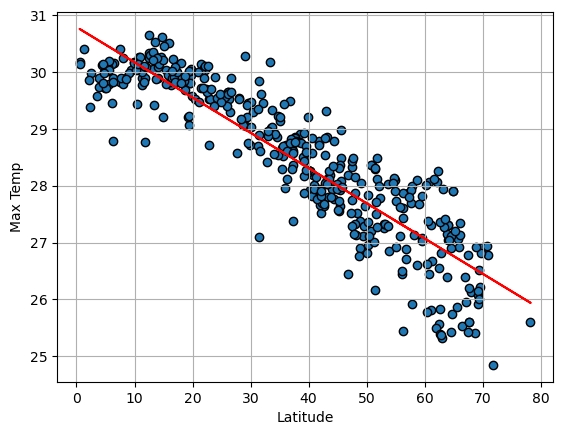

In [52]:
# Linear regression on Northern Hemisphere
nlatx=northern_hemi_df["Lat"]
ntempy=northern_hemi_df["Max Temp"]
line_equation=regress_plot(nlatx,ntempy)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation,(5.8,0.8),fontsize=15,color="red")
plt.show()


The r-value is: City_ID
0      857.059014
1      794.432422
2      907.579400
3      834.674676
7      839.575836
          ...    
586    811.004608
589    809.525348
590    809.141153
591    814.943392
592    797.734175
Name: Lat, Length: 260, dtype: float64


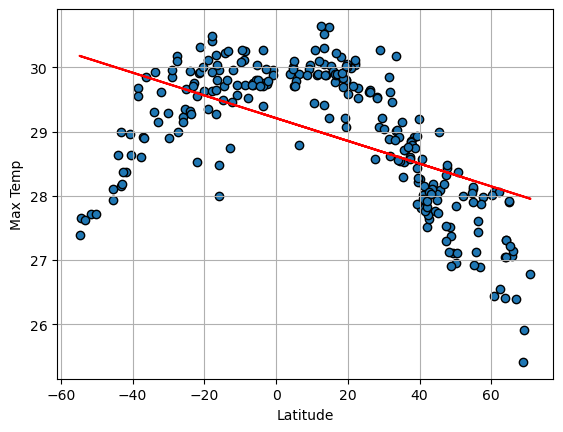

In [53]:
# Linear regression on Southern Hemisphere
slatx=southern_hemi_df["Lat"]
stempy=southern_hemi_df["Max Temp"]
line_equation=regress_plot(slatx,stempy)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation,(5.8,0.8),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the temperature goes down as the latitude goes up. In the southern hemisphere, there's also a drop in temperature, however it's not as steep as in the north.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: City_ID
1      5714.996834
3      3917.046835
4      5876.274734
7      3723.840759
8      5614.271936
          ...     
588    4847.051879
589    4995.649199
590    5013.279552
591    4750.759786
592    5552.907179
Name: Lat, Length: 412, dtype: float64


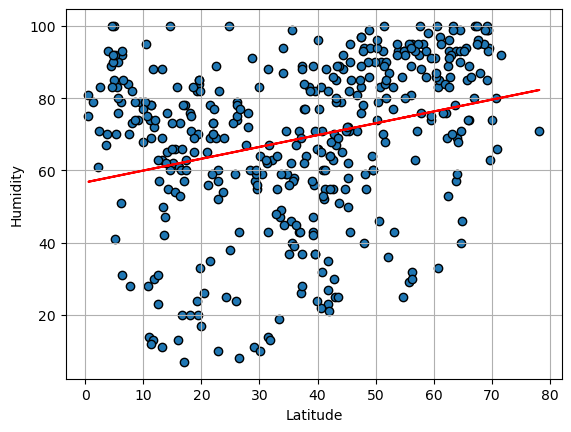

In [54]:
# Northern Hemisphere
nhumidy=northern_hemi_df["Humidity"]
line_equation=regress_plot(nlatx,nhumidy)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation,(5.8,0.8),fontsize=15,color="red")
plt.show()

The r-value is: City_ID
0      5456.700679
1      4467.981275
2      6296.830547
3      5096.313360
7      5174.574606
          ...     
586    4723.603706
589    4700.605447
590    4694.638066
591    4785.011343
592    4518.552290
Name: Lat, Length: 260, dtype: float64


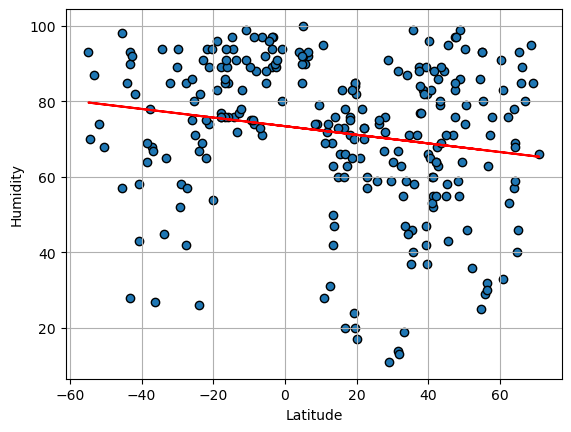

In [55]:
# Southern Hemisphere
shumidy=southern_hemi_df["Humidity"]
line_equation=regress_plot(slatx,shumidy)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation,(5.8,0.8),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, humidity goes up as latitude goes up. However, in the southern hemisphere, humidity goes down as lat goes up.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: City_ID
1      4611.362866
3      2965.739142
4      4761.257982
7      2792.388273
8      4517.907649
          ...     
588    3810.517582
589    3946.868525
590    3963.068139
591    3722.344995
592    4461.034100
Name: Lat, Length: 412, dtype: float64


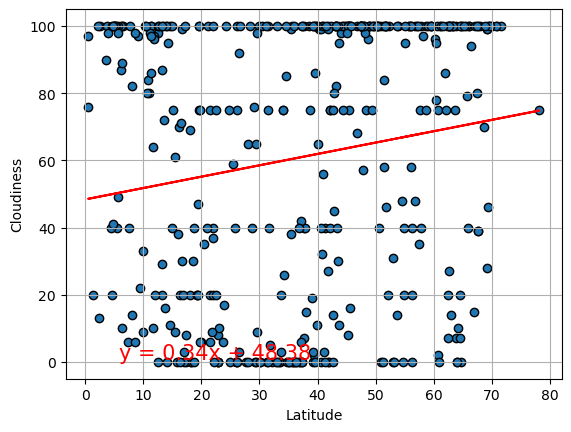

In [56]:
# Northern Hemisphere
ncloudy=northern_hemi_df["Cloudiness"]
line_equation=regress_plot(nlatx,ncloudy)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation,(5.8,0.8),fontsize=15,color="red")
plt.show()

The r-value is: City_ID
0      3698.855938
1      3593.994698
2      3781.730895
3      3661.657965
7      3669.828752
          ...     
586    3621.985452
589    3619.494253
590    3618.847004
591    3628.611810
592    3599.585856
Name: Lat, Length: 260, dtype: float64


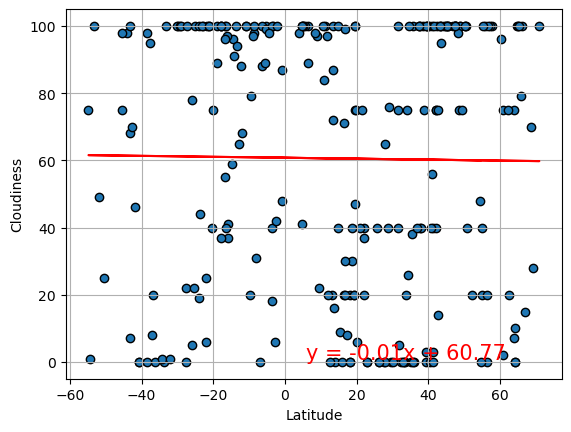

In [58]:
# Southern Hemisphere
scloudy=southern_hemi_df["Cloudiness"]
line_equation=regress_plot(slatx,scloudy)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation,(5.8,0.8),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the cloudiness goes up as latitude goes up. However, in the southern hemisphere, cloudiness goes down by a miniscule amount.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: City_ID
1      16.862958
3      12.626854
4      17.234750
7      12.159127
8      16.630181
         ...    
588    14.841119
589    15.189994
590    15.231306
591    14.614386
592    16.488142
Name: Lat, Length: 412, dtype: float64


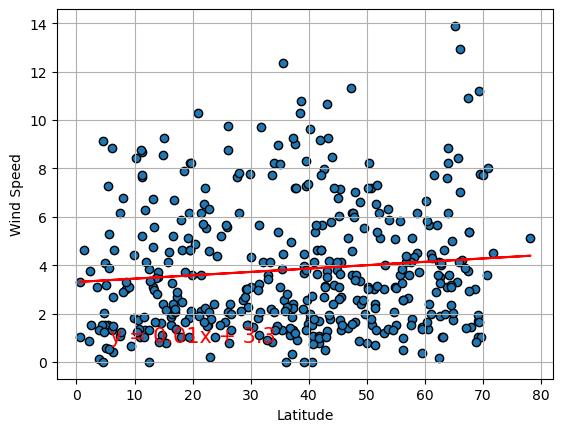

In [59]:
# Northern Hemisphere
nwindy=northern_hemi_df["Wind Speed"]
line_equation=regress_plot(nlatx,nwindy)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation,(5.8,0.8),fontsize=15,color="red")
plt.show()

The r-value is: City_ID
0      14.558616
1      22.001130
2       9.814482
3      17.011648
7      16.455376
         ...    
586    19.853679
589    20.040004
590    20.088567
591    19.362614
592    21.562688
Name: Lat, Length: 260, dtype: float64


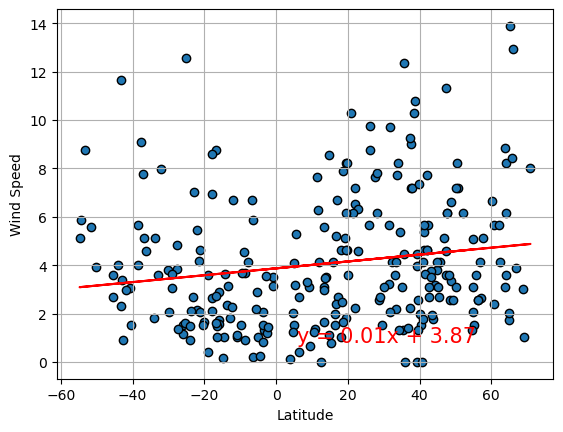

In [64]:
# Southern Hemisphere
swindy=southern_hemi_df["Wind Speed"]
line_equation=regress_plot(slatx,swindy)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation,(5.8,0.8),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** Wind speed seems to rise at similar rates in both hemispheres.